In [1]:
import sympy as sp
from sympy import init_printing
from sympy import symbols
from sympy.matrices import Matrix

init_printing(use_unicode=True)

In [2]:
x_0, y_0, x_in, y_in, x_mint, y_mint = symbols("x_0, y_0, x_in, y_in, x_mint, y_mint")

The fundamental equation we will start with is:

$$
\begin{align}
\begin{bmatrix}
x_{\text{mint}} \\
y_{\text{mint}}
\end{bmatrix}
&=
x_{\text{mint}} \begin{bmatrix}
1 \\
p
\end{bmatrix}
+
\begin{bmatrix}
0 \\
2\alpha
\end{bmatrix}
\\
\begin{bmatrix}
x_{\text{in}} \\
y_{\text{in}}
\end{bmatrix}
&=
x_{\text{in}} \begin{bmatrix}
1 \\
p
\end{bmatrix}
+
\begin{bmatrix}
0 \\
\beta
\end{bmatrix}
\\
\begin{bmatrix}
x_1 \\
y_1
\end{bmatrix}
&=
\begin{bmatrix}
x_0 \cdot \frac{y_0 + \alpha + \beta}{y_0 + 2(\alpha + \beta)} \\
y_0 + \alpha + \beta
\end{bmatrix}
\end{align}
$$

The fact that

$$
\begin{bmatrix}
x_{\text{mint}} \\
y_{\text{mint}} - 2\alpha
\end{bmatrix}, 
\begin{bmatrix}
x_{\text{in}} \\
y_{\text{in}} - \beta
\end{bmatrix}, 
\begin{bmatrix}
x_1 \\
y_1
\end{bmatrix}
$$

are all parallel gives us following matrix equation:

$$
\begin{equation}
\begin{bmatrix}
2x_0 + 2x_{\text{mint}} & 2x_{\text{mint}} \\
2x_{\text{in}} & 2x_{\text{in}} + x_0
\end{bmatrix}
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}
=
\begin{bmatrix}
x_0 y_{\text{mint}} - x_{\text{mint}} y_0 \\
x_0 y_{\text{in}} - x_{\text{in}} y_0
\end{bmatrix}
\end{equation}
$$


In [3]:
A = Matrix([[2 * x_0 + 2 * x_mint, 2 * x_mint], [2 * x_in, x_0 + 2 * x_in]])
v = Matrix([x_0 * y_mint - x_mint * y_0, x_0 * y_in - x_in * y_0])

Since determinant is always positive above equation is solvable.

In [4]:
A.det() > 0

$ \alpha, \beta $ are:

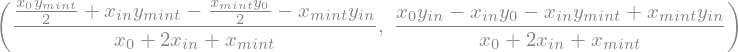

In [5]:
[a, b] = A.solve(v)

sp.simplify(a), sp.simplify(b)

Thus $ x_1, y_1 $ are:

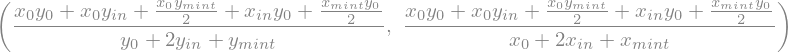

In [6]:
[x_1, y_1] = Matrix([x_0 * (y_0 + a + b) / (y_0 + 2 * (a + b)), y_0 + a + b])

sp.simplify(x_1), sp.simplify(y_1)

The clearing price $ p $ is:

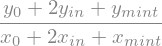

In [7]:
p = sp.simplify(y_1 / x_1)

p

$x_{\text{out}}, y_{\text{out}}$ are:

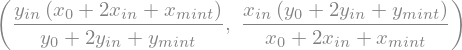

In [8]:
[x_out, y_out] = Matrix([y_in / p, x_in * p])

sp.simplify(x_out), sp.simplify(y_out)

$x_2, y_2$, which are the reserves after minting LP tokens, are:

True


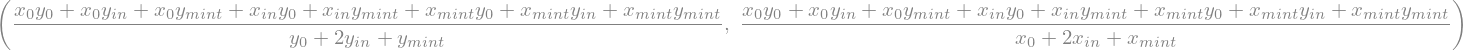

In [9]:
[x_2, y_2] = Matrix([x_1 + x_mint + a / p, y_1 + p * x_mint + a])

print(sp.simplify(x_mint * p + a) == sp.simplify(y_mint - a))

sp.simplify(x_2), sp.simplify(y_2)

When $T$ is total supply of LP token before the batch settlement, newly minted share $t$ will be:

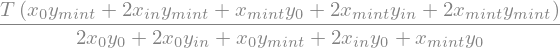

In [10]:
T = symbols("T")

t = T * ((p * x_2 + y_2) / (p * x_1 + y_1) - 1)

sp.simplify(t)

Lastly, the sanity check:
\begin{align}
x_0 + x_{\text{in}} + x_{\text{mint}} &= x_2 + x_{\text{out}} \\
y_0 + y_{\text{in}} + y_{\text{mint}} &= y_2 + y_{\text{out}}
\end{align}

In [11]:
sp.simplify(x_0 + x_in + x_mint - x_2 - x_out), sp.simplify(y_0 + y_in + y_mint - y_2 - y_out)